<a href="https://colab.research.google.com/github/NimaZah/fast/blob/main/Teddy_vs_Grissly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision import *
from fastai.vision.widgets import *
from fastai.metrics import error_rate

In [4]:
#import google drive package
from  google.colab import drive
# connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
#save path to project folder 
root_path = 'gdrive/My Drive/Ai Projects/'
proj_path = 'gdrive/My Drive/Ai Projects/'
folders = ['grizzly','teddy']
#save fastai path 
p_path = Path(proj_path)

In [30]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [31]:
#create databunch 
dls = bears.dataloaders(p_path, bs=64)

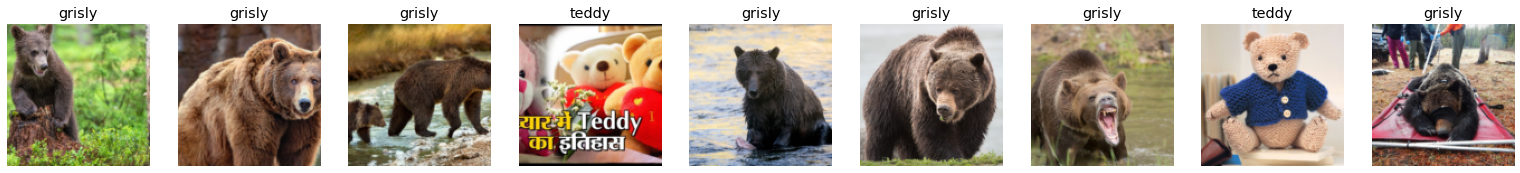

In [35]:
dls.valid.show_batch(max_n=9, nrows=1)

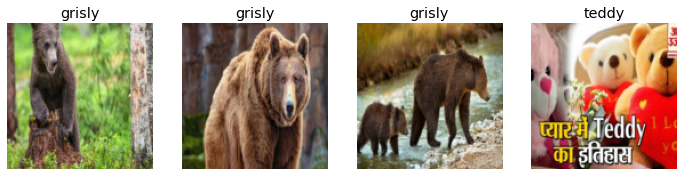

In [36]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(p_path, bs=64)
dls.valid.show_batch(max_n=4, nrows=1)

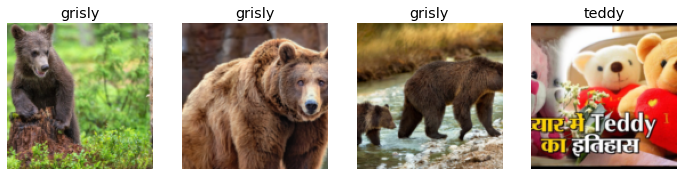

In [37]:
# normalize the images to have pixel values between -1 and 1.
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(p_path, bs=64)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
# create a learner to train our model.
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

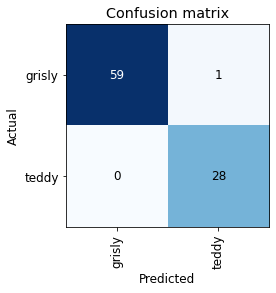

In [39]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(1, nrows=5)

In [53]:
# learn.export('grizzly_teddy_resnet18.pkl')

learn.export(proj_path + 'bears.pkl')

In [55]:
learn_inf = load_learner(proj_path + 'bears.pkl')

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [26]:
#unfreeze model 
learn.unfreeze()

In [ ]:
learn.lr_find()

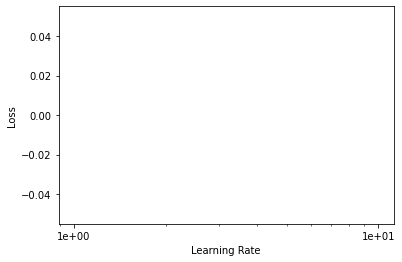

In [28]:
learn.recorder.plot()

In [ ]:
#fit model with optimal learning rate 
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In [30]:
#save model 
learn.save('stage-2')

In [ ]:
#interpret model 
learn.load('stage-2')
interp = ClassificationInterpretation.from_learner(learn)
# learn.interpret()

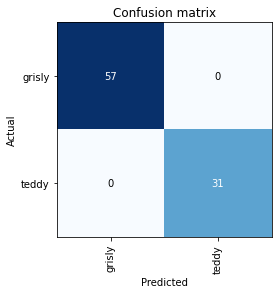

In [32]:
interp.plot_confusion_matrix()

In [ ]:
# plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(10,10))

In [ ]:
!pip install gradio
import gradio as gr
folders = ['grizzly','teddy']
def classify(image):
  category,_,losses = learn.predict(image)
  return category

In [63]:
gr_interface = gr.Interface(
    classify,
    gr.inputs.Image(shape=(224,224)),
    gr.outputs.Label(num_top_classes=1),
    title="Bears Classifier",
    description="This is a model trained to classify grizzly and teddy bears. It was trained using the fastai library on Google Colab, and created by Nima Zahedinameghi. To use, upload an image of a bear and see if it can classify it!"
)
gr_interface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://46076.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f0374779950>,
 'http://127.0.0.1:7861/',
 'https://46076.gradio.app')